In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

In [15]:
def bigger_fonts(ax):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

In [36]:
spotify_df = pd.read_csv('../data/data.csv', infer_datetime_format=True, parse_dates=['Date'])

In [92]:
spotify_df['day_of_week'] = spotify_df['Date'].dt.dayofweek
spotify_df['day'] = spotify_df['day_of_week'].map({0:'Monday',1:'Tuesday',\
                                                     2:'Wednesday',3:'Thursday',\
                                                     4:'Friday',5:'Saturday',6:'Sunday'})
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,day
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ar,6,Sunday
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ar,6,Sunday
2,3,Reggaetón Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ar,6,Sunday
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ar,6,Sunday
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ar,6,Sunday


In [93]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017625 entries, 0 to 2017624
Data columns (total 9 columns):
Position       int64
Track Name     object
Artist         object
Streams        int64
URL            object
Date           datetime64[ns]
Region         object
day_of_week    int64
day            object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.5+ MB


In [94]:
spotify_df.describe()

,Position,Streams,day_of_week
count,2.017625e+06,2.017625e+06,2.017625e+06
mean,9.394797e+01,5.208577e+04,2.993814e+00
std,5.735935e+01,2.095484e+05,2.002716e+00
min,1.000000e+00,1.001000e+03,0.000000e+00
25%,4.400000e+01,3.189000e+03,1.000000e+00
50%,9.100000e+01,8.674000e+03,3.000000e+00
75%,1.420000e+02,2.814300e+04,5.000000e+00
max,2.000000e+02,1.138152e+07,6.000000e+00


In [95]:
top_o_charts = spotify_df[spotify_df['Position'] == 1]
songs_that_topped = set((top_o_charts['Track Name'].tolist()))
print(songs_that_topped)
print(len(songs_that_topped))
region_charts = top_o_charts[['Date','Region','Streams','Artist','Track Name', 'day_of_week','day']].reset_index()
print(len(region_charts))
region_charts.head()

{nan, 'HUMBLE.', 'As I Lay Me Down', 'Θ. Macarena', 'Paradinha', 'Hanuri (feat. Boyat)', 'Ked Af Det', 'Α. Nwaar Is The New Black', 'Unforgettable', 'Juna', '24K Magic', 'Hear Me Now', 'Una Lady Como Tú', 'Oh bah oui', 'Nougat', 'Yhtäccii', 'Dexter', 'Você Partiu Meu Coração', 'Vai Embrazando', 'Volare', 'Liikaa Sussa Kii', 'Antaudun', 'One Dance', "Say You Won't Let Go", 'Rockabye (feat. Sean Paul & Anne-Marie)', 'Habiba', 'Lamborghini', 'Such A Boy', 'Eikö Sua Hävetä', 'Happy Days', 'La Varrio (El Barrio)', 'EYO (feat. Nelli Matula)', 'Escápate Conmigo', "Occidentali's Karma - Radio Edit", 'Rica', 'Nostalgia', 'Believer', 'De Snakker', 'Olha a Explosão', 'Réseaux', 'Alleen', 'Deu Onda', 'OK', 'Time', 'Senza Pagare VS T-Pain', 'Let Me Love You', 'City Lights', 'Rahan takii', 'Tran Tran', 'Despacito - Remix', 'Mä hiihdän', 'Chantaje', 'Starboy', 'Attention', 'Amar pelos Dois', 'Something Just Like This', 'Millionär', 'Me Rehúso', 'Feels', 'Sua Cara (feat. Anitta & Pabllo Vittar)', 'Sha

,index,Date,Region,Streams,Artist,Track Name,day_of_week,day
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday


In [96]:
avg_streams = spotify_df.groupby(['Region','Date'])['Region','Streams'].mean().reset_index()
avg_streams.rename(columns={'Streams':'avg_streams'}, inplace=True)
print(len(avg_streams))
avg_streams.head()

11854


,Region,Date,avg_streams
0,ar,2017-01-01,39444.360
1,ar,2017-01-02,30050.205
2,ar,2017-01-03,29609.535
3,ar,2017-01-04,30097.865
4,ar,2017-01-05,31118.230


In [97]:
streaming_data = region_charts.merge(avg_streams, on=('Date', 'Region'), how='left')
streaming_data.rename(columns={'Streams':'Streams_#1_song'}, inplace=True)
streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday,39444.360
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday,30050.205
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday,29609.535
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday,30097.865
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday,31118.230


In [98]:
global_streaming_data = streaming_data[streaming_data['Region'] == 'global']
global_streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


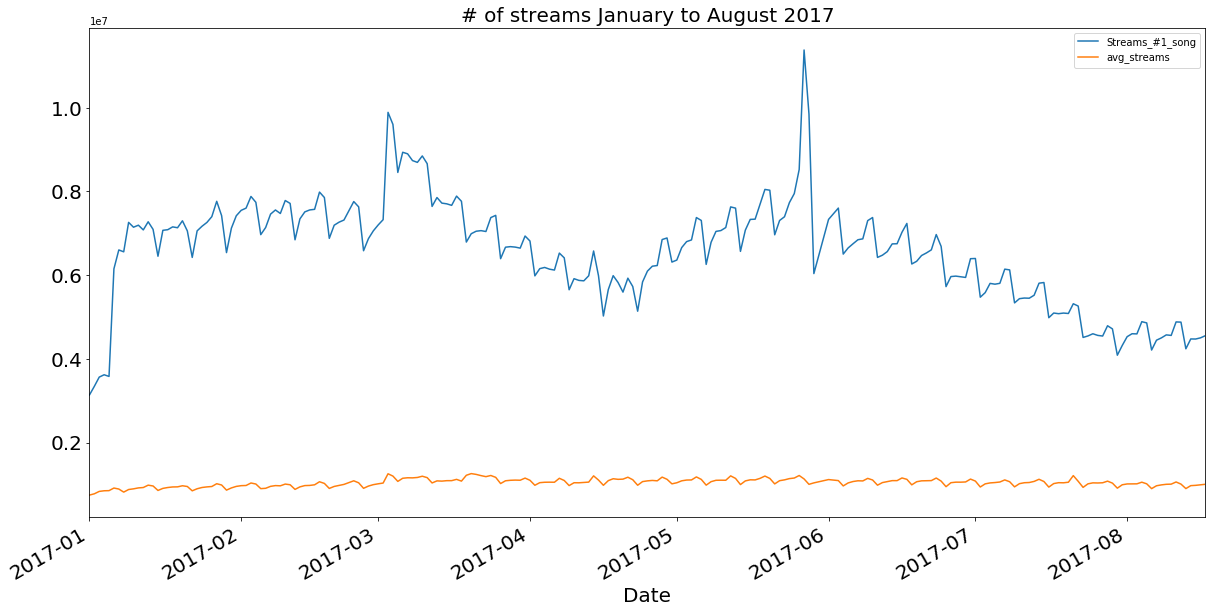

In [99]:
#Plotting streaming data
ax = global_streaming_data.plot(kind='line',x='Date', \
                                y=['Streams_#1_song', 'avg_streams'], figsize=(20,10),\
                                title='# of streams January to August 2017')
#increasing font size of plot
bigger_fonts(ax)

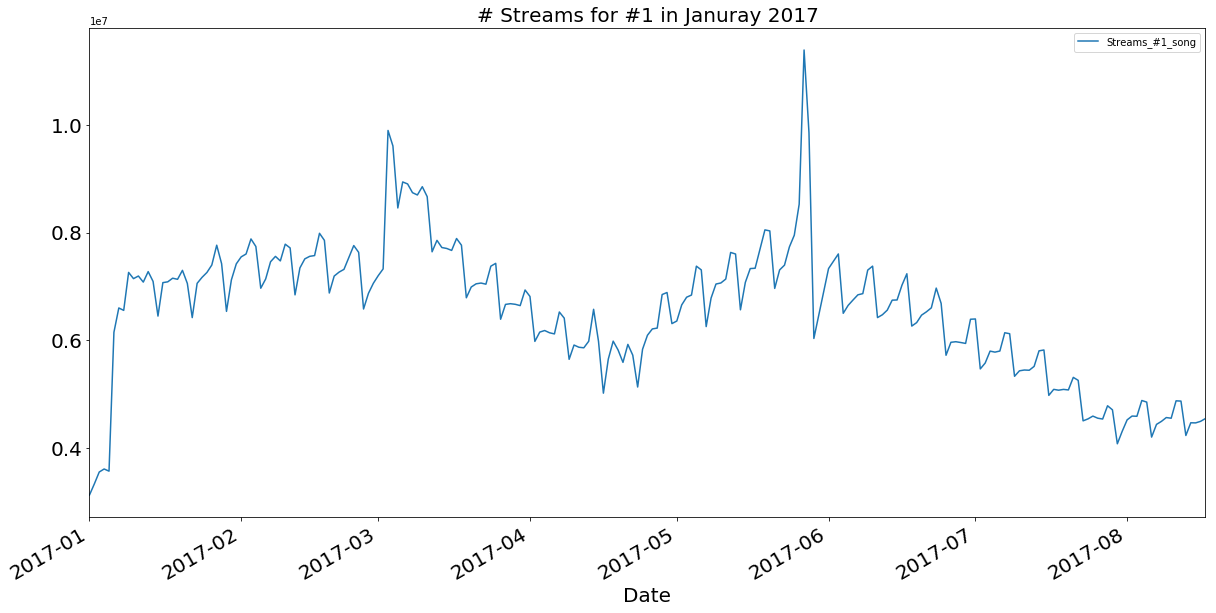

In [100]:
#plotting januray #1 song streaming data
ax = global_streaming_data.plot(kind='line',x='Date', y=['Streams_#1_song'], \
                                                   figsize=(20,10), title='# Streams for #1 in Januray 2017')

#increasing font size of plot
bigger_fonts(ax)

#dataframe januray #1 song streams
# global_streaming_data[['Date','Streams_#1_song','day_of_week']]

In [101]:
#getting streaming data for Januray
jan_data = global_streaming_data[global_streaming_data['Date'] <= '2017-02-01']
jan_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


## Looks like # of Streams is cyclical

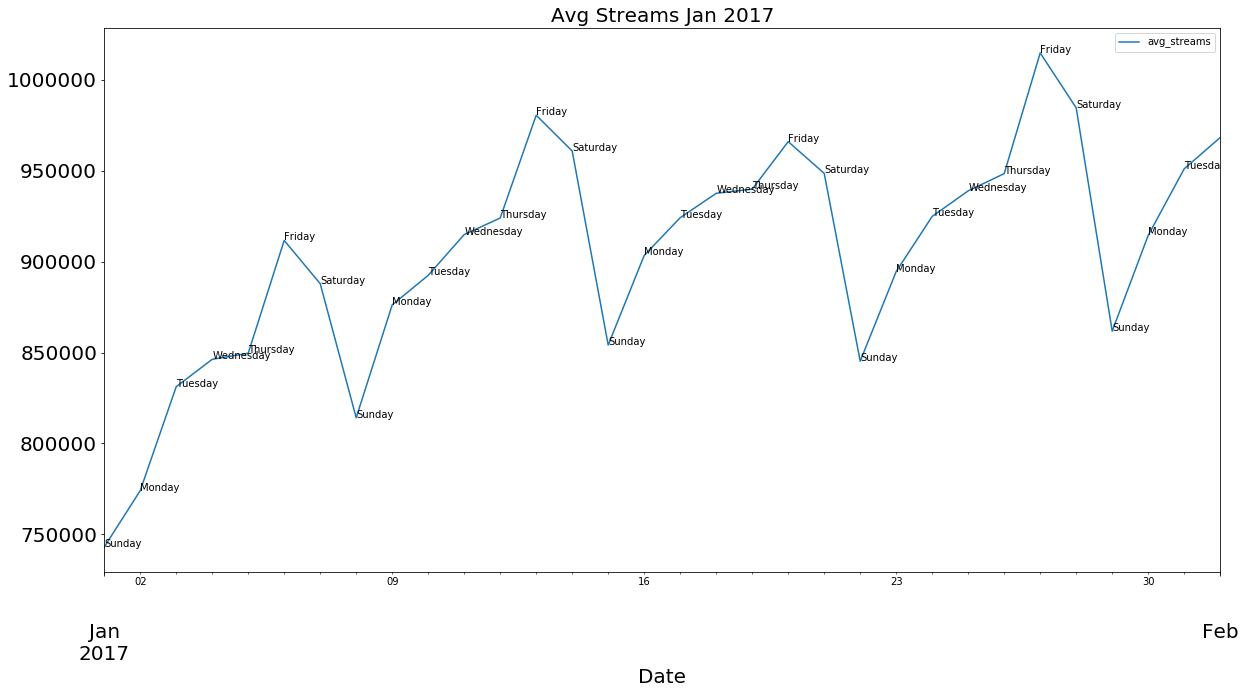

In [103]:
#plotting januray avg_streaming data
ax = jan_data.plot(kind='line',x='Date', y=['avg_streams'], \
                                figsize=(20,10), \
                                title='Avg Streams Jan 2017')
#increasing font size of plot
bigger_fonts(ax)

# Label points with day of week
date = jan_data['Date'].tolist()
avg_streams = jan_data['avg_streams'].tolist()
day = jan_data['day'].tolist()
for d, i, j in zip(day, date, avg_streams):
    ax.annotate(d, xy=(i,j),clip_on=True)

#dataframe januray avg_streams
# global_streaming_data[['Date','avg_streams','day_of_week']]

## Streaming increases everyday of the week peaking on Friday and Saturday. But drops significantly on Sundays

,day_of_week,day,Streams
0,0,Monday,51114.237236
1,1,Tuesday,51762.966347
2,2,Wednesday,52362.444005
3,3,Thursday,51800.786690
4,4,Friday,55138.074701
5,5,Saturday,53917.110096
6,6,Sunday,48609.954158


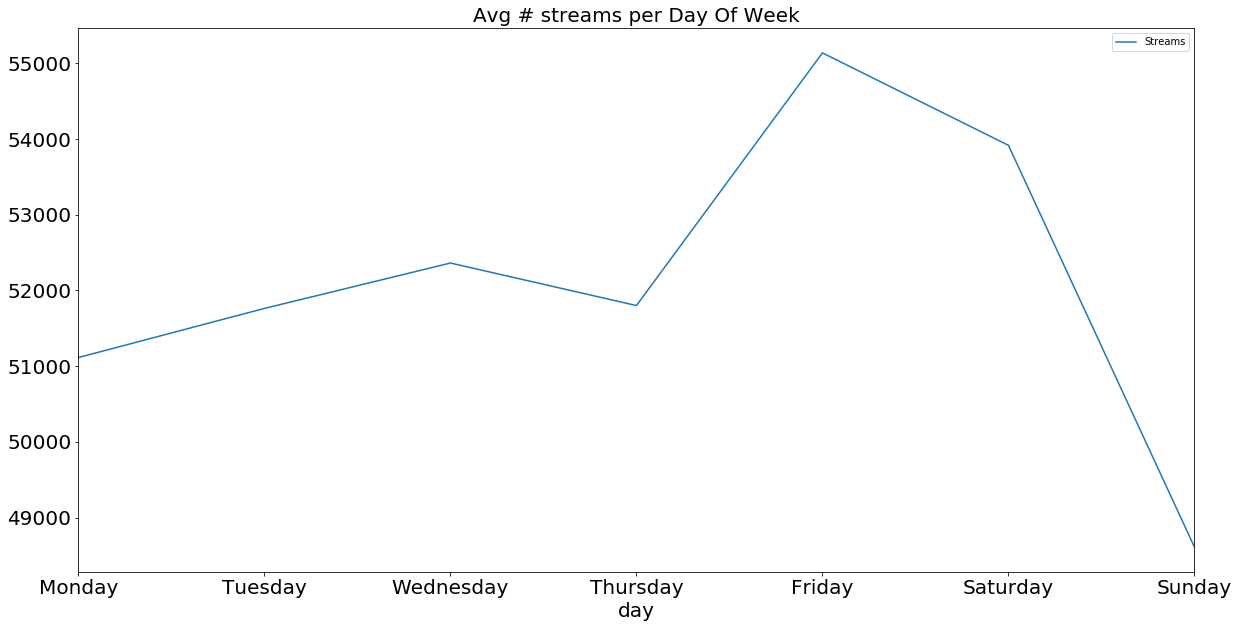

In [113]:
dow = spotify_df.groupby(['day_of_week','day']).mean()['Streams'].reset_index()

#plotting avg_streams per day of week
ax = dow.plot(x='day', y='Streams', \
                           figsize=(20,10), \
                           title='Avg # streams per Day Of Week')
bigger_fonts(ax)
dow

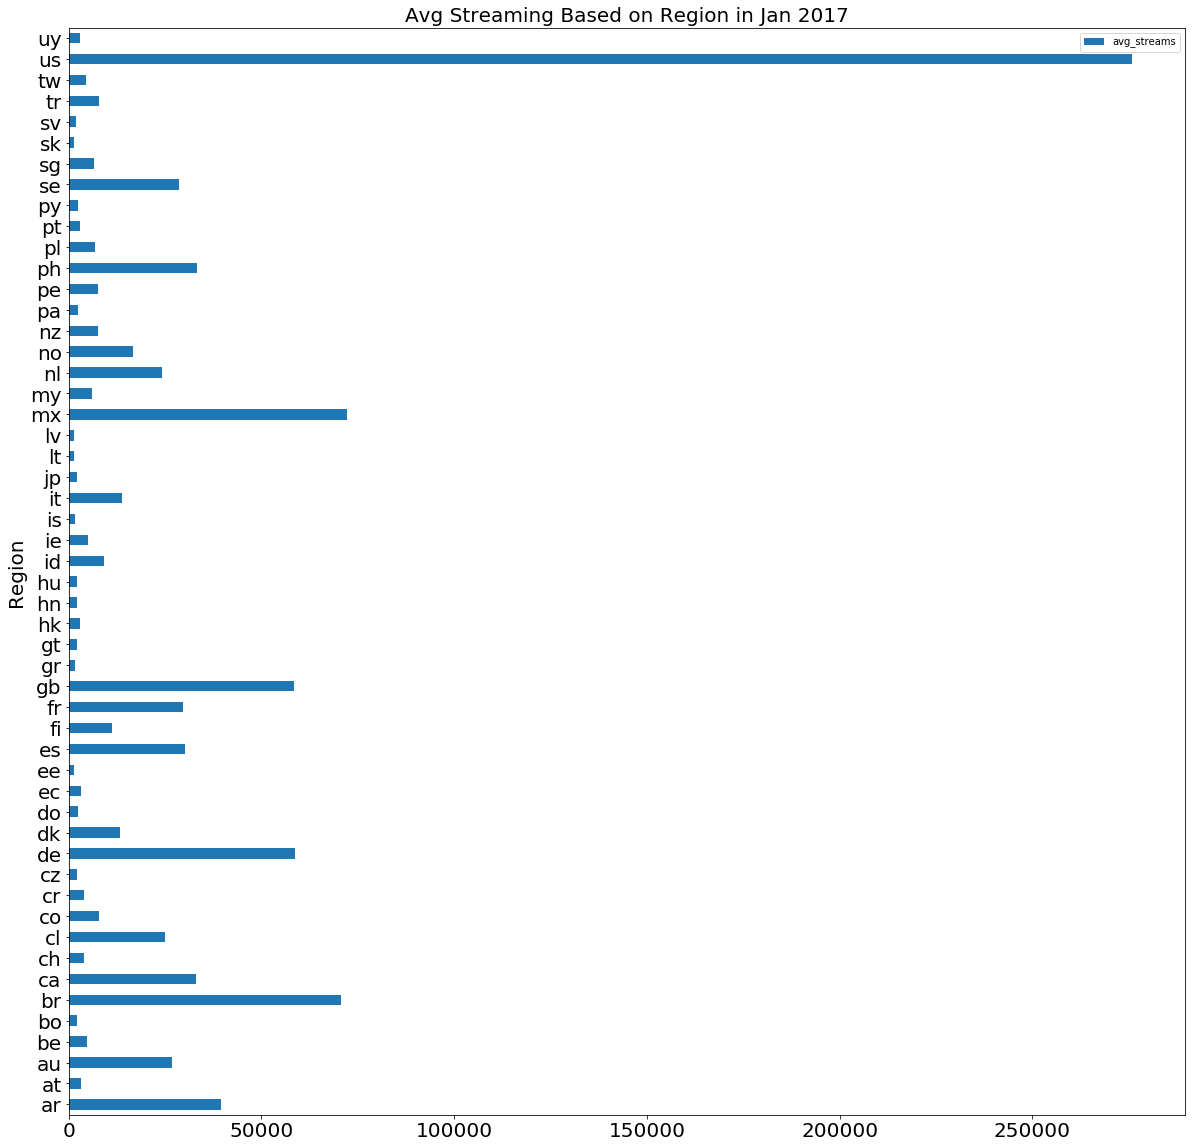

In [32]:
streaming_data_no_global = streaming_data[streaming_data['Region'] != 'global']
ax = streaming_data_no_global[streaming_data_no_global['Date'] == '2017-01-01'].plot.barh(x='Region', \
                                                                                          y=['avg_streams'],\
                                                                                        figsize=(20,20),\
                                                                                         title = 'Avg Streaming Based on Region in Jan 2017')
bigger_fonts(ax)

In [ ]:
streaming_data.to_json('/Users/gmgtex/Documents/My Tableau Repository/DataSources/spotify_streaming.json')